<a href="https://colab.research.google.com/github/HChandeepa/Sri_Lanka_Food_Prices_Analysis/blob/Master/Sri_Lanka_Food_Prices_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive, files
# drive.mount('/content/drive')

## Load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
# import dataset.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/wfp_food_prices_lka.csv')

start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Load Time: {pandas_load_time:.4f} seconds")

Pandas Load Time: 0.0001 seconds


In [5]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       18506 non-null  object 
 1   admin1     18377 non-null  object 
 2   admin2     18377 non-null  object 
 3   market     18506 non-null  object 
 4   latitude   18377 non-null  float64
 5   longitude  18377 non-null  float64
 6   category   18506 non-null  object 
 7   commodity  18506 non-null  object 
 8   unit       18506 non-null  object 
 9   priceflag  18506 non-null  object 
 10  pricetype  18506 non-null  object 
 11  currency   18506 non-null  object 
 12  price      18506 non-null  float64
 13  usdprice   18506 non-null  float64
dtypes: float64(4), object(10)
memory usage: 2.0+ MB


In [6]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [7]:
df.describe()

,latitude,longitude,price,usdprice
count,18377.000000,18377.000000,18506.000000,18506.000000
mean,7.481010,80.568017,581.991651,1.953836
std,0.947683,0.533244,606.396366,1.920414
min,5.952000,79.831700,11.500000,0.060200
25%,6.906044,80.045803,150.000000,0.655825
50%,7.253400,80.515701,320.120000,1.043450
75%,8.038129,81.005890,883.207500,2.930650
max,9.656700,81.700000,3735.420000,11.945700


In [8]:
selected_columns = ['admin1','admin2','market','category','commodity','unit','pricetype']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in admin1: ['Western' 'Eastern' 'Northern' nan 'Central' 'North Central'
 'North Western' 'Sabaragamuwa' 'Southern' 'Uva']


Unique values in admin2: ['Colombo' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mullattivu' 'Vavuniya' nan 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam' 'Ratnapura' 'Galle'
 'Hambantota' 'Matara' 'Badulla' 'Moneragala' 'Gampaha' 'Kalutara'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mulaitivu' 'Vavuniya' 'National Average' 'Kandy' 'Matale'
 'Nuwara Eliya' 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam'
 'Rathnapura' 'Galle' 'Hambantota' 'Matara' 'Badulla' 'Monaragala'
 'Gampaha' 'Kalutara' 'Kegalle' 'Economic Centre-Dambulla'
 'Economic Centre-Pettah' 'Economic Centre-Maradagahamula'
 'Fish market-Negombo' 'Fish market-Peliyagoda'
 'Economic Centre - Peliyagoda' 'Hanguranketha' 'Dehiattakandiya'
 'Ga

In [9]:
df.rename(columns={'admin1': 'province', 'admin2': 'district'}, inplace=True)

In [10]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [11]:
df.dtypes

,0
date,object
province,object
district,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [12]:
df[['price']].min()

,0
price,11.5


In [13]:
df[['price']].max()

,0
price,3735.42


In [14]:
df[['usdprice']].min()

,0
usdprice,0.0602


In [15]:
df[['usdprice']].max()

,0
usdprice,11.9457


## Data Cleaning

In [16]:
# Check for missing values
print(df.isnull().sum())

date           0
province     129
district     129
market         0
latitude     129
longitude    129
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64


129 rows out of 18,506 → 0.7% missing data, which is very low.

In [17]:
df.dropna(subset=['province', 'district', 'latitude', 'longitude'], inplace=True)

start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Clean Time: {pandas_load_time:.4f} seconds")

Pandas Clean Time: 0.0000 seconds


In [18]:
print(df.isnull().sum())

date         0
province     0
district     0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64


### Date Formatting

In [19]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')


start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Convert 'date' column to datetime format Time: {pandas_load_time:.4f} seconds")

Pandas Convert 'date' column to datetime format Time: 0.0000 seconds


### Handling Duplicates

In [20]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [21]:
selected_columns = ['province','district','market','category','commodity','unit','pricetype']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Western' 'Eastern' 'Northern' 'Central' 'North Central' 'North Western'
 'Sabaragamuwa' 'Southern' 'Uva']


Unique values in district: ['Colombo' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mullattivu' 'Vavuniya' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam' 'Ratnapura' 'Galle'
 'Hambantota' 'Matara' 'Badulla' 'Moneragala' 'Gampaha' 'Kalutara'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mulaitivu' 'Vavuniya' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam' 'Rathnapura' 'Galle'
 'Hambantota' 'Matara' 'Badulla' 'Monaragala' 'Gampaha' 'Kalutara'
 'Kegalle' 'Economic Centre-Dambulla' 'Economic Centre-Pettah'
 'Economic Centre-Maradagahamula' 'Fish market-Negombo'
 'Fish market-Peliyagoda' 'Economic Centre - Peliyagoda' 'Hanguranketha'
 'Dehiattakandiya' 'Galenbindunuwewa' 'Thambut

## Standardization (Z-score Normalization)

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'price' and 'usdprice' columns
df[['price', 'usdprice']] = scaler.fit_transform(df[['price', 'usdprice']])

# Check the scaled data
print(df[['price', 'usdprice']].head())

      price  usdprice
0 -0.920421 -0.878425
1 -0.908956 -0.842253
2 -0.920338 -0.878789
3 -0.920470 -0.877750
4 -0.910011 -0.844592


<ipython-input-23-e2978d08cb93>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True, color="blue")
<ipython-input-23-e2978d08cb93>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['usdprice'], shade=True, color="red")


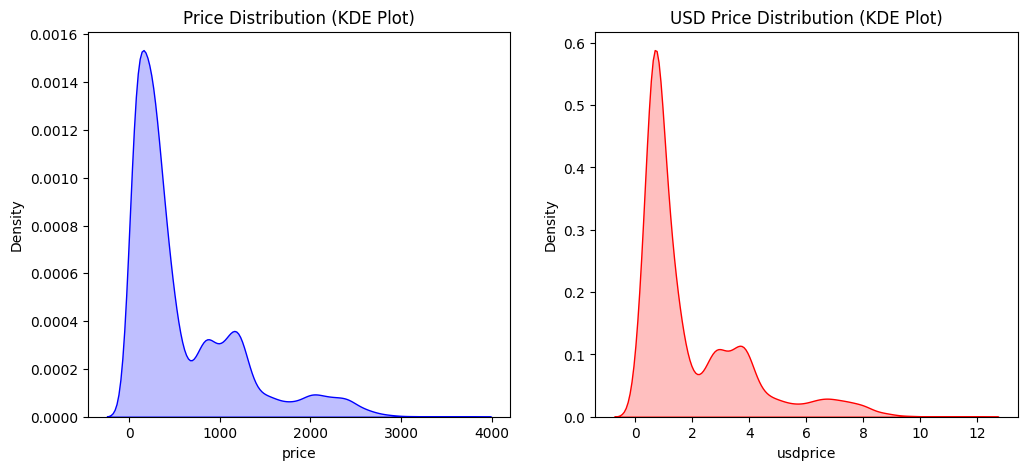

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE Plot for price and usdprice
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(df['price'], shade=True, color="blue")
plt.title("Price Distribution (KDE Plot)")

plt.subplot(1, 2, 2)
sns.kdeplot(df['usdprice'], shade=True, color="red")
plt.title("USD Price Distribution (KDE Plot)")

plt.show()

## Outlier Detection & Removal

In [ ]:
# Boxplot before outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['price']])
plt.title("Before Outlier Removal")
plt.show()

In [ ]:
# Boxplot before outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['usdprice']])
plt.title("Before Outlier Removal")
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Assuming your dataframe is named df

# Calculate Z-scores for price and usdprice columns
df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()
df['usdprice'] = (df['usdprice'] - df['usdprice'].mean()) / df['usdprice'].std()

# Set a threshold for Z-scores (commonly 3 or -3)
threshold = 3

# Filter out the outliers where Z-score is greater than threshold (or less than -threshold)
df = df[(df['price'].abs() <= threshold) & (df['usdprice'].abs() <= threshold)]

# # Save the cleaned dataset
# df_cleaned.to_csv("cleaned_wfp_food_prices_lka_zscore.csv", index=False)

# Print number of rows before and after outlier removal
print(f"Rows before: {df.shape[0]}, Rows after outlier removal: {df.shape[0]}")

In [ ]:
# Filter out rows with negative values for price and usdprice
df = df[(df['price'] >= 0) & (df['usdprice'] >= 0)]

# Outlier detection using IQR method
Q1 = df[['price', 'usdprice']].quantile(0.25)
Q3 = df[['price', 'usdprice']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

# Ensure lower bound for price and usdprice is not negative
lower_bound['price'] = max(0, lower_bound['price'])  # Ensure price lower bound is not negative
lower_bound['usdprice'] = max(0, lower_bound['usdprice'])  # Ensure usdprice lower bound is not negative

# Filter out outliers
df = df[~((df['price'] < lower_bound['price']) | (df['price'] > upper_bound['price']) |
          (df['usdprice'] < lower_bound['usdprice']) | (df['usdprice'] > upper_bound['usdprice']))]

# # Save the cleaned dataset
# df.to_csv("cleaned_wfp_food_prices_lka.csv", index=False)

# Print number of rows before and after outlier removal
print(f"Rows before: {df.shape[0]}, Rows after outlier removal: {df.shape[0]}")

# Print IQR Lower and Upper Bounds
print("IQR Lower Bound:\n", lower_bound)
print("IQR Upper Bound:\n", upper_bound)


In [ ]:
# Boxplot after outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['price']])
plt.title("After Outlier Removal")
plt.show()

In [ ]:
# Boxplot after outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['usdprice']])
plt.title("After Outlier Removal")
plt.show()

In [ ]:
hjhjhjhjhjhjhj

## Feature Engineering

In [ ]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
df.head()

In [ ]:
# # Save the cleaned data
# df.to_csv("cleaned_data.csv", index=False)

## With Spark

In [ ]:
from pyspark.sql import SparkSession
import time

# Initialize Spark session
spark = SparkSession.builder.appName("PerformanceComparison").getOrCreate()

# Measure load time
start_time = time.time()

# Load dataset
df_spark = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/wfp_food_prices_lka.csv", header=True, inferSchema=True)

end_time = time.time()
spark_load_time = end_time - start_time
print(f"Spark Load Time: {spark_load_time:.4f} seconds")

# Show schema and sample rows
df_spark.printSchema()
df_spark.show(5)

In [ ]:
from pyspark.sql.functions import col, sum

# Count missing values for each column
missing_values = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns])

# Show missing value counts
missing_values.show()

In [ ]:
from pyspark.sql.functions import col

# Measure cleaning time
start_time = time.time()

df_spark = df_spark.dropna(subset=['admin1', 'admin2', 'latitude', 'longitude'])

end_time = time.time()
spark_clean_time = end_time - start_time
print(f"Spark Clean Time: {spark_clean_time:.4f} seconds")

# Show cleaned data
df_spark.show(5)

In [ ]:
from pyspark.sql.functions import col, sum

# Count missing values for each column
missing_values = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns])

# Show missing value counts
missing_values.show()

In [ ]:
# Rename columns
df_spark = df_spark.withColumnRenamed("admin1", "province") \
                   .withColumnRenamed("admin2", "district")

# Show updated schema
df_spark.printSchema()

In [ ]:
df_spark.show(5)

In [ ]:
from pyspark.sql.functions import to_date
import time

# Measure execution time
start_time = time.time()

# Convert 'date' column to Spark Date format (Assuming the format is '%m/%d/%Y')
df_spark = df_spark.withColumn("date", to_date(df_spark["date"], "MM/dd/yyyy"))

end_time = time.time()
spark_datetime_time = end_time - start_time
print(f"Spark Convert 'date' column to datetime format Time: {spark_datetime_time:.4f} seconds")

In [ ]:
from pyspark.sql.functions import year, month

# Measure execution time
start_time = time.time()

# Extract year and month from the 'date' column
df_spark = df_spark.withColumn("year", year(df_spark["date"])) \
                   .withColumn("month", month(df_spark["date"]))

end_time = time.time()
feature_engineering_time = end_time - start_time
print(f"Spark Feature Engineering Time: {feature_engineering_time:.4f} seconds")

## Predictive Analytics with Spark MLlib

---



### Set up Spark Environment

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("FoodPricePredictiveAnalytics").getOrCreate()

### Load Data

In [ ]:
df_ml = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/wfp_food_prices_lka_cleaned_data.csv", header=True, inferSchema=True)
df_ml.printSchema()